# Assignment 2

### MACS 30000, Dr. Evans
### Shanglun Li

Due Wednesday, Oct. 17 at 11:30 AM

In [1]:
# Import packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
# from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Turn of Notebook Package Warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Imputing age and gender

#### (a) 
In order to impute  age ($age_i$) and gender ($female_i$) variables into the BestIncome.txt data by using information from the SurveyIncome.txt data, I will fit a linear regression model and a logistic model using SurveyIncome.txt:

For the linear regression model, I will set age as the response variable, total income (tot_inc) and weight (wgt) as the explanatory variables. 

$$age = \beta_0 + \beta_1 \times tot\underline{ }inc + \beta_2 \times wgt + \epsilon$$

For the logistic regression model, I will set gender as the response variable, total income and weight as the explanatory variables. 

$$logit(female) = \beta_0 + \beta_1 \times tot\underline{ }inc + \beta_2 \times wgt + \epsilon$$
Then, I will use the linear regression models to predict the age variable in BestIncome.txt using the total income and weight variables (Note that total income can be calculated by adding labor income, lab_inc, and capital income, cap_inc, together) and use logistic regression model to predict the gender variable in BestIncome.txt using total income and weight variables.
$$age_{pred} = b_0 + b_1 \times tot\underline{ }inc + b_2 \times wgt$$

$$P(female) = \frac{\exp(b_0 + b_1 \times tot\underline{ }inc + b_2 \times wgt)}{1+\exp(b_0 + b_1 \times tot\underline{ }inc + b_2 \times wgt)}$$

Then, to categorize the predicted observation to female when the predicted value is greater than or equal to 0.5 and to male when the predicted value is less than 0.5.

In [2]:
# Read Data
BestIncome = pd.read_csv('BestIncome.txt', header = None, names = ["lab_inc", "cap_inc", "hgt", "wgt"])
BestIncome.head()

,lab_inc,cap_inc,hgt,wgt
0,52655.605507,9279.509829,64.568138,152.920634
1,70586.979225,9451.016902,65.727648,159.534414
2,53738.008339,8078.132315,66.268796,152.502405
3,55128.180903,12692.670403,62.910559,149.218189
4,44482.794867,9812.975746,68.678295,152.726358


In [3]:
BestIncome.shape

(10000, 4)

In [4]:
SurveyIncome = pd.read_csv('SurvIncome.txt', header = None, names = ["tot_inc", "wgt", "age", "female"])
SurveyIncome.head()

,tot_inc,wgt,age,female
0,63642.513655,134.998269,46.610021,1.0
1,49177.380692,134.392957,48.791349,1.0
2,67833.339128,126.482992,48.429894,1.0
3,62962.266217,128.038121,41.543926,1.0
4,58716.952597,126.211980,41.201245,1.0


In [5]:
SurveyIncome.shape

(1000, 4)

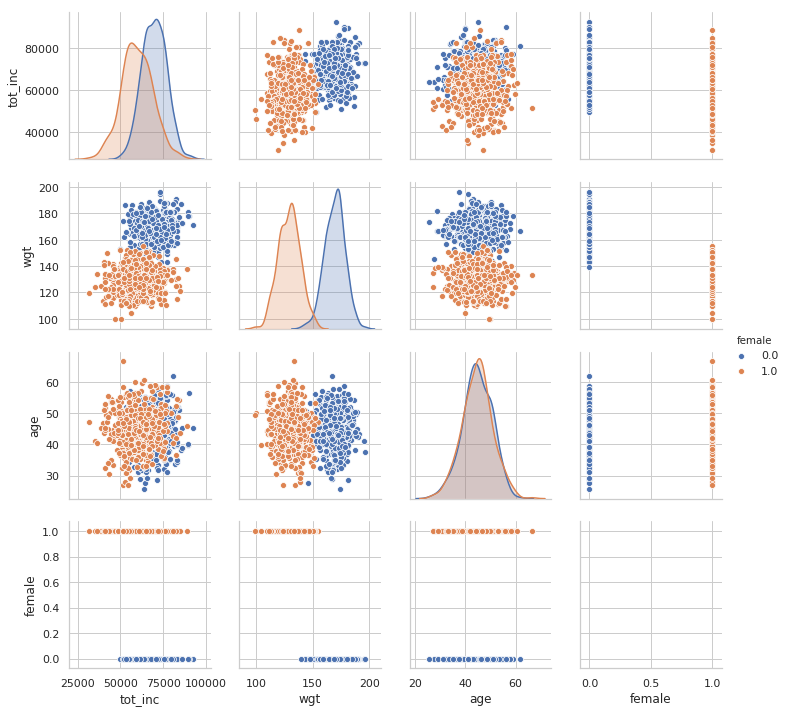

In [6]:
sns.pairplot(SurveyIncome, hue = "female")

In [7]:
count_male = len(SurveyIncome[SurveyIncome['female'] == 0])
count_female = len(SurveyIncome[SurveyIncome['female'] == 1])
print(count_male, count_female)
pct_of_female = count_female / (count_male + count_female)
print("percentage of female is", pct_of_female * 100)
pct_of_male = count_male / (count_male + count_female)
print("percentage of male", pct_of_male * 100)

500 500
percentage of female is 50.0
percentage of male 50.0


As we can see from the percentage calculation result shown below, we can see that the count of male and female are same.

#### (b) 
Here is where I'll use my proposed method from part (a) to impute variables.

In [8]:
# Define response and explanatory variables
res  = 'age'
expl = ['tot_inc', 'wgt']

X, y = SurveyIncome[expl], SurveyIncome[res]

In [9]:
X.head()

,tot_inc,wgt
0,63642.513655,134.998269
1,49177.380692,134.392957
2,67833.339128,126.482992
3,62962.266217,128.038121
4,58716.952597,126.211980


In [10]:
y.head()

0    46.610021
1    48.791349
2    48.429894
3    41.543926
4    41.201245
Name: age, dtype: float64

In [11]:
X = sm.add_constant(X, prepend = False)
X.head()

,tot_inc,wgt,const
0,63642.513655,134.998269,1.0
1,49177.380692,134.392957,1.0
2,67833.339128,126.482992,1.0
3,62962.266217,128.038121,1.0
4,58716.952597,126.211980,1.0


In [12]:
m = sm.OLS(y, X)
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6326
Date:                Mon, 15 Oct 2018   Prob (F-statistic):              0.531
Time:                        14:22:17   Log-Likelihood:                -3199.4
No. Observations:                1000   AIC:                             6405.
Df Residuals:                     997   BIC:                             6419.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
tot_inc      2.52e-05   2.26e-05      1.114      0.2

As we can see from the output, we will have the following linear regression equation:
$$age = 44.2097 + 0.0000252 \times tot\underline{ }inc - 0.0067 \times wgt$$
Then, we can do prediction as follows: 

In [13]:
# Calculate the total income by adding labor income and capital income together
BestIncome['tot_inc'] = BestIncome['lab_inc'] + BestIncome['cap_inc']
BestIncome.head()
X = BestIncome[expl]
X = sm.add_constant(X, prepend = False)
X.head()

,tot_inc,wgt,const
0,61935.115336,152.920634,1.0
1,80037.996127,159.534414,1.0
2,61816.140654,152.502405,1.0
3,67820.851305,149.218189,1.0
4,54295.770612,152.726358,1.0


In [14]:
BestIncome['age'] = res.predict(X)
BestIncome.head()

,lab_inc,cap_inc,hgt,wgt,tot_inc,age
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336,44.742614
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127,45.154387
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654,44.742427
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305,44.915836
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612,44.551391


Next, we will impute the gender variable using logistic regression model:

In [15]:
# Define response and explanatory variables
res  = 'female'
expl = ['tot_inc', 'wgt']

X, y = SurveyIncome[expl], SurveyIncome[res]

In [16]:
X = sm.add_constant(X, prepend = False)
X.head()

,tot_inc,wgt,const
0,63642.513655,134.998269,1.0
1,49177.380692,134.392957,1.0
2,67833.339128,126.482992,1.0
3,62962.266217,128.038121,1.0
4,58716.952597,126.211980,1.0


In [17]:
m = sm.Logit(y, X)
res = m.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.036050
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 female   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 Oct 2018   Pseudo R-squ.:                  0.9480
Time:                        14:22:18   Log-Likelihood:                -36.050
converged:                       True   LL-Null:                       -693.15
                                        LLR p-value:                4.232e-286
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
tot_inc       -0.0002   4.25e-05     -3.660      0.000      -0.000   -7.22e-05
wgt           -0.4460      0

As we can see from the output, the logistic regression model is 
$$logit(female) = 76.7929 - 0.0002 \times tot\underline{ }inc - 0.4460 \times wgt$$

In [18]:
X = BestIncome[expl]
BestIncome = BestIncome.drop(columns = "tot_inc")
X = sm.add_constant(X, prepend = False)
X.head()

,tot_inc,wgt,const
0,61935.115336,152.920634,1.0
1,80037.996127,159.534414,1.0
2,61816.140654,152.502405,1.0
3,67820.851305,149.218189,1.0
4,54295.770612,152.726358,1.0


In [19]:
BestIncome['female'] = res.predict(X)
BestIncome['female'][BestIncome['female'] >= 0.5] = 1
BestIncome['female'][BestIncome['female'] < 0.5] = 0
BestIncome.head()

,lab_inc,cap_inc,hgt,wgt,age,female
0,52655.605507,9279.509829,64.568138,152.920634,44.742614,0.0
1,70586.979225,9451.016902,65.727648,159.534414,45.154387,0.0
2,53738.008339,8078.132315,66.268796,152.502405,44.742427,0.0
3,55128.180903,12692.670403,62.910559,149.218189,44.915836,0.0
4,44482.794867,9812.975746,68.678295,152.726358,44.551391,1.0


#### (c) 
Here is where I'll report the descriptive statistics for my new imputed variables.

In [20]:
# Calculate the mean, standard deviation, minimum, maximum and number of observations of age in BestIncome.txt
predvar = BestIncome[['age', 'female']]
predvar.describe()

,age,female
count,10000.000000,10000.000000
mean,44.890828,0.454600
std,0.219150,0.497959
min,43.976495,0.000000
25%,44.743776,0.000000
50%,44.886944,0.000000
75%,45.038991,1.000000
max,45.703819,1.000000


As we can see from the output, for the predicted age variable in BestIncome.txt, the mean is 44.890828, the standard deviation is	0.219150, the minimum is 43.976495, the maximum is 45.703819, the number of observations is 10000. For the predicted female variable in BestIncome.txt, the mean is 0.4546, the standard deviation is 0.497959, the minimum is 0, the maximum is 1, the number of observations is 10000.

#### (d) Correlation matrix for the now six variables

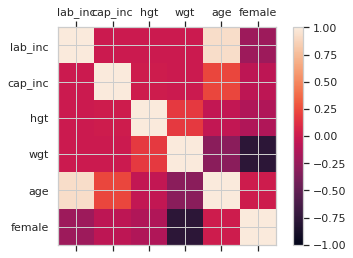

In [21]:
# Correlation matrix code and output
def corr_plot(df):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    names = df.columns
    N = len(names)
    
    correlations = df.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,N,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()
    
corr_plot(BestIncome)

In [22]:
corr = BestIncome.corr()
corr.style.background_gradient()

,lab_inc,cap_inc,hgt,wgt,age,female
lab_inc,1,0.0053253,0.00278978,0.00450691,0.924053,-0.215469
cap_inc,0.0053253,1,0.0215716,0.00629868,0.234159,-0.0625691
hgt,0.00278978,0.0215716,1,0.172103,-0.0450828,-0.127416
wgt,0.00450691,0.00629868,0.172103,1,-0.300288,-0.763821
age,0.924053,0.234159,-0.0450828,-0.300288,1,0.0200595
female,-0.215469,-0.0625691,-0.127416,-0.763821,0.0200595,1


### 2. Stationarity and data drift

#### (a) Estimate by OLS and report coefficients

In [23]:
# Read in my third data set
IncomeIntel = pd.read_csv('IncomeIntel.txt', header = None, names = ["grad_year", "gre_qnt", "salary_p4"])
IncomeIntel.head()

,grad_year,gre_qnt,salary_p4
0,2001.0,739.737072,67400.475185
1,2001.0,721.811673,67600.584142
2,2001.0,736.277908,58704.880589
3,2001.0,770.498485,64707.290345
4,2001.0,735.002861,51737.324165


In [24]:
# Run regression model
X = IncomeIntel["gre_qnt"]
X = sm.add_constant(X, prepend = False)
y = IncomeIntel["salary_p4"]
m = sm.OLS(y, X)
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              salary_p4   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     356.3
Date:                Mon, 15 Oct 2018   Prob (F-statistic):           3.43e-68
Time:                        14:22:18   Log-Likelihood:                -10673.
No. Observations:                1000   AIC:                         2.135e+04
Df Residuals:                     998   BIC:                         2.136e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gre_qnt      -25.7632      1.365    -18.875      0.0

#### Report coefficients and SE's
$$\beta_0 = 89540 \ \ \ \ \ \ \ \ \ s.e.(\beta_0) = 878.764$$
$$\beta_1 = -25.7632 \ \ \ \ \ \ \ \ \ s.e.(\beta_1) = 1.365$$

#### (b) Create a scatterplot of GRE score and graduation year. 

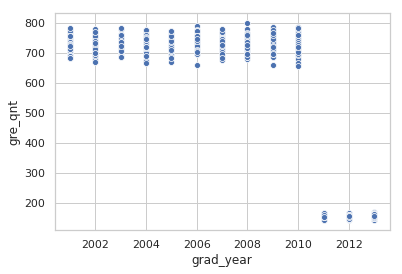

In [25]:
# Code and output of scatterplot
x = IncomeIntel['grad_year']
y = IncomeIntel['gre_qnt']
sns.scatterplot(x,y)

As we can see from the output, the scatterplot has a huge change starting year 2011, which is the year that 800 score scale has changed to 170. Thus, our linear regression model used previously is not reasonable, since the GRE quant scores are not on a same scale. In addition, the difficulty of GRE quant is different among different years. In order to modify this, we have to figure out a way to make GRE quant score on the same scale.  

The solution is that I will calculate the Z-score for each year scores, and then concate them. Then, the GRE score will uniquely represent the position of the students' performance.

In [26]:
# Code to implement solution
mean_gre = {}
sd_gre = {}
for i in range(2001, 2014):
    gre = IncomeIntel['gre_qnt'][IncomeIntel['grad_year'] == i]
    mean_gre[i] = gre.mean()
    sd_gre[i] = gre.std()
IncomeIntel['z_qnt'] = 0
for i in range(2001, 2014):
    IncomeIntel['z_qnt'][IncomeIntel['grad_year'] == i] = (IncomeIntel['gre_qnt'][IncomeIntel['grad_year'] == i] - mean_gre[i]) / sd_gre[i]
IncomeIntel.head()


,grad_year,gre_qnt,salary_p4,z_qnt
0,2001.0,739.737072,67400.475185,0.406740
1,2001.0,721.811673,67600.584142,-0.356635
2,2001.0,736.277908,58704.880589,0.259427
3,2001.0,770.498485,64707.290345,1.716750
4,2001.0,735.002861,51737.324165,0.205128


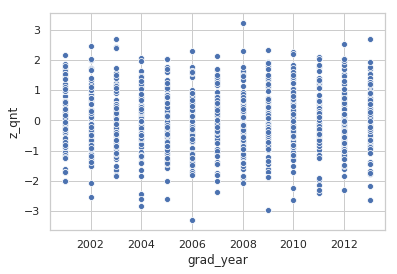

In [27]:
# Code and output of new scatterplot
x = IncomeIntel['grad_year']
y = IncomeIntel['z_qnt']
sns.scatterplot(x,y)

As we can see from the new scatterplot of the z-score of GRE quantitative score, the plot looks much better than the old one. The change of score scale has been solved.

#### (c) Create a scatterplot of income and graduation year

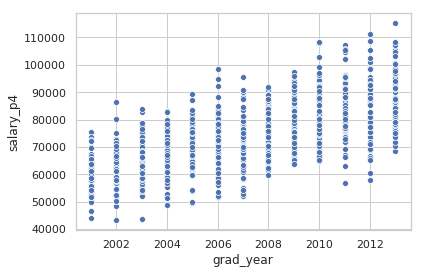

In [28]:
# Code and output of scatterplot
x = IncomeIntel['grad_year']
y = IncomeIntel['salary_p4']
sns.scatterplot(x,y)

As we can see from the scatterplot above, we can see that there is an increasing pattern in the plot, which implies that the data is not stationary. In order to deal with this, we can estimate the growth rate and eliminate the effect of it.  
Specifically, we can first take the average salary of each year and estimate the growth rate by taking the average of each year's growth rate. For each year's growth rate, we can use the following equation:
$$growth\ rate_{year_i} = \frac{average\ salary\ of\ year_i - average\ salary\ of\ year_{i - 1}}{average\ salary\ of\ year_{i - 1}}$$

In [29]:
#  Code to implement a solution
avg_inc_by_year = IncomeIntel['salary_p4'].groupby(IncomeIntel['grad_year']).mean().values
later_year = avg_inc_by_year[1:]
former_year = avg_inc_by_year[0:-1]
growth_rate_by_year = ((later_year - former_year) / former_year).mean()
growth_rate = growth_rate_by_year.mean()
growth_rate

0.030835347092883603

In [30]:
IncomeIntel['modified_salary'] = 0
for i in range(2001, 2014):
    IncomeIntel['modified_salary'][IncomeIntel['grad_year'] == i] = IncomeIntel['salary_p4'][IncomeIntel['grad_year'] == i] / ((1 + growth_rate) ** (i - 2001))
IncomeIntel.head()

,grad_year,gre_qnt,salary_p4,z_qnt,modified_salary
0,2001.0,739.737072,67400.475185,0.406740,67400.475185
1,2001.0,721.811673,67600.584142,-0.356635,67600.584142
2,2001.0,736.277908,58704.880589,0.259427,58704.880589
3,2001.0,770.498485,64707.290345,1.716750,64707.290345
4,2001.0,735.002861,51737.324165,0.205128,51737.324165


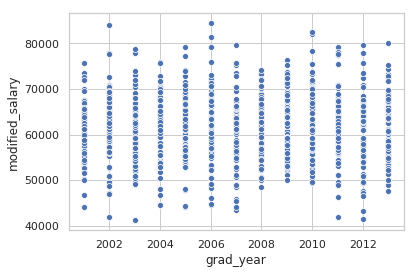

In [31]:
# Code and output of scatterplot
x = IncomeIntel['grad_year']
y = IncomeIntel['modified_salary']
sns.scatterplot(x,y)

As we can see from the scatterplot, the increasing pattern has been removed. 

#### (d) Re-estimate coefficients with updated variables.

In [32]:
# Code to re-estimate, output of new coefficients
# Run regression model
X = IncomeIntel["z_qnt"]
X = sm.add_constant(X, prepend = False)
y = IncomeIntel["modified_salary"]
m = sm.OLS(y, X)
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        modified_salary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4395
Date:                Mon, 15 Oct 2018   Prob (F-statistic):              0.508
Time:                        14:22:19   Log-Likelihood:                -10291.
No. Observations:                1000   AIC:                         2.059e+04
Df Residuals:                     998   BIC:                         2.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
z_qnt       -150.6097    227.193     -0.663      0.5

#### Report new coefficients and SE's
$$\beta_0 = 61420 \ \ \ \ \ \ \ \ \ s.e.(\beta_0) = 225.711$$
$$\beta_1 = -150.6097 \ \ \ \ \ \ \ \ \ s.e.(\beta_1) = 227.193$$

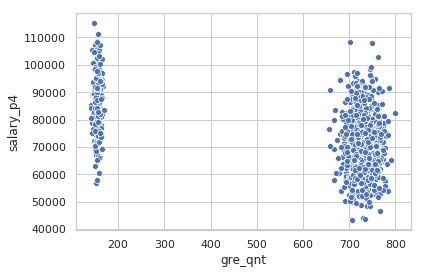

In [33]:
x_old = IncomeIntel['gre_qnt']
y_old = IncomeIntel['salary_p4']
sns.scatterplot(x_old, y_old)

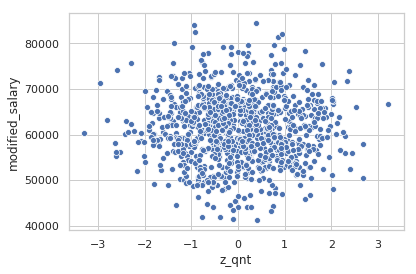

In [34]:
x_new = IncomeIntel['z_qnt']
y_new = IncomeIntel['modified_salary']
sns.scatterplot(x_new, y_new)

Before we changed the variables, we can see from the scatterplot of the old variables version that the scatteplot actually plots the latest years' salaries on the left and old years' salaries on the right. Thus, since the salary is increasing by year, we have a negitive relationship between gre_qnt and salary_p4.  
On the other hand, after we modified the gre_qnt to z_qnt and salary_p4 to modified_salary, we can see that the scatterplot looks much better. Thus, the final result of the linear regression will be more informative than the old one. Therefore, we can conclude that the GRE quantitative score is negatively associated with the salary after 4 years of graduation, since the coefficient of $\beta_1$ is negative.

### 3. Assessment of Kossinets and Watts.

See attached PDF. 